In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import datetime

In [2]:
di=pd.read_csv('Training_Input_2dx8C9Q.csv')

In [3]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 218 entries, ID to X_3_lag_0
dtypes: float64(217), int64(1)
memory usage: 16.6 MB


In [4]:
di.head(20)

,ID,weight_I_1,weight_I_2,weight_I_3,weight_I_4,weight_I_5,weight_I_6,weight_I_7,I_1_lag_20,I_1_lag_19,...,X_3_lag_9,X_3_lag_8,X_3_lag_7,X_3_lag_6,X_3_lag_5,X_3_lag_4,X_3_lag_3,X_3_lag_2,X_3_lag_1,X_3_lag_0
0,0,0.15,0.00,0.05,0.80,0.00,0.00,0.00,100.0,100.047398,...,101.383783,102.054669,102.375596,103.148605,103.148605,103.046483,103.075701,103.134043,103.221509,103.338192
1,1,0.00,0.00,0.00,0.40,0.25,0.00,0.35,100.0,99.912339,...,100.911142,100.938707,100.993926,101.132016,100.745489,100.524617,100.303743,100.276090,100.303743,100.554527
2,2,0.85,0.00,0.00,0.15,0.00,0.00,0.00,100.0,99.481681,...,100.373084,100.581716,100.313489,100.790251,101.013756,100.686030,100.686030,100.060233,99.747384,99.970889
3,3,0.00,0.00,0.70,0.05,0.25,0.00,0.00,100.0,100.124618,...,100.844136,101.040072,101.055122,101.567682,101.703322,101.974603,101.733422,101.838963,102.080144,101.688272
4,4,0.00,0.55,0.05,0.00,0.00,0.00,0.40,100.0,100.000000,...,99.665093,99.482389,99.604192,100.030499,99.847797,100.426310,100.426310,100.822217,100.913521,100.852619
5,5,0.10,0.00,0.00,0.00,0.00,0.00,0.90,100.0,100.830429,...,101.541742,101.197305,101.771363,102.345411,102.657045,102.919468,102.804653,102.870260,102.952272,102.870260
6,6,0.00,0.25,0.00,0.00,0.70,0.05,0.00,100.0,100.000927,...,100.638666,100.777561,100.958045,101.110801,100.860827,101.485631,101.152390,101.629304,101.699410,101.965917
7,7,0.00,0.00,0.15,0.10,0.00,0.75,0.00,100.0,99.912339,...,100.911142,100.938707,100.993926,101.132016,100.745489,100.524617,100.303743,100.276090,100.303743,100.554527
8,8,0.40,0.30,0.00,0.00,0.00,0.30,0.00,100.0,99.995851,...,101.009043,100.935945,100.935945,100.175489,100.526470,101.023644,101.696401,101.871892,102.047380,101.959589
9,9,0.65,0.00,0.00,0.10,0.00,0.25,0.00,100.0,99.839883,...,101.442465,100.876775,101.796090,101.994037,102.559727,102.489038,101.852659,100.933345,101.103051,102.036487


In [5]:
di=di.set_index('ID')

In [6]:
do=pd.read_csv('Training_Output_IJhBXtA.csv')
do.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
ID        10000 non-null int64
Target    10000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 156.3 KB


In [7]:
do=do.set_index('ID')

In [8]:
do.head()

,Target
ID,
0,-12.007941
1,2.294867
2,0.652308
3,2.412364
4,8.517471


In [9]:
dt=pd.read_csv('Testing_Input_dPKY3Rf.csv')
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450 entries, 0 to 4449
Columns: 218 entries, ID to X_3_lag_0
dtypes: float64(217), int64(1)
memory usage: 7.4 MB


In [10]:
dt=dt.set_index('ID')

In [11]:
len(dt.columns)

217

In [12]:
# pour les 7 séries de 21 jours calculons les perfs quotidiennes qui valent log(valeur/valeur la veille)
for i in range(1,8):
    for s in range(20):
        di['L_'+str(i)+'_lag_'+str(s)]=np.log(di['I_'+str(i)+'_lag_'+str(s)]/di['I_'+str(i)+'_lag_'+str(s+1)])
        dt['L_'+str(i)+'_lag_'+str(s)]=np.log(dt['I_'+str(i)+'_lag_'+str(s)]/dt['I_'+str(i)+'_lag_'+str(s+1)])

In [13]:
# de même pour les variables macro
for i in range(1,4):
    for s in range(20):
        di['LX_'+str(i)+'_lag_'+str(s)]=np.log(di['X_'+str(i)+'_lag_'+str(s)]/di['X_'+str(i)+'_lag_'+str(s+1)])
        dt['LX_'+str(i)+'_lag_'+str(s)]=np.log(dt['X_'+str(i)+'_lag_'+str(s)]/dt['X_'+str(i)+'_lag_'+str(s+1)])

In [14]:
#ajoutons pour chacun des 7 la moyenne des 21 valeurs (pour aider au calcul de la covariance)
# et la moyenne des 5 dernières pour estimer le rendement à venir
for i in range(1,8):
    di['M20_'+str(i)]=0
    dt['M20_'+str(i)]=0
    di['M5_'+str(i)]=0
    dt['M5_'+str(i)]=0
    for s in range(20):
        di['M20_'+str(i)]+=di['L_'+str(i)+'_lag_'+str(s)]
        dt['M20_'+str(i)]+=dt['L_'+str(i)+'_lag_'+str(s)]
    for s in range(5):
        di['M5_'+str(i)]+=di['L_'+str(i)+'_lag_'+str(s)]
        dt['M5_'+str(i)]+=dt['L_'+str(i)+'_lag_'+str(s)]

In [15]:
# et des moyennes des variables macro
for i in range(1,4):
    di['LX20_'+str(i)]=0
    dt['LX20_'+str(i)]=0
    di['LX5_'+str(i)]=0
    dt['LX5_'+str(i)]=0
    for s in range(20):
        di['LX20_'+str(i)]+=di['LX_'+str(i)+'_lag_'+str(s)]
        dt['LX20_'+str(i)]+=dt['LX_'+str(i)+'_lag_'+str(s)]
    for s in range(5):
        di['LX5_'+str(i)]+=di['LX_'+str(i)+'_lag_'+str(s)]
        dt['LX5_'+str(i)]+=dt['LX_'+str(i)+'_lag_'+str(s)]

In [16]:
# calculons une valeur de rendement pondéré récent
di['R0']=0
dt['R0']=0
for i in range(1,8):
    di['R0']+=di['M5_'+str(i)]*di['weight_I_'+str(i)]
    dt['R0']+=dt['M5_'+str(i)]*dt['weight_I_'+str(i)]
di['R0']=di['R0']*(252/5)
dt['R0']=dt['R0']*(252/5)

In [17]:
# et d'autres un peu moins récentes (ce qui implique de calculer des moyennes 5 décalées)
for i in range(1,8):
    di['M5_1_'+str(i)]=0
    dt['M5_1_'+str(i)]=0
    for s in range(5):
        di['M5_1_'+str(i)]+=di['L_'+str(i)+'_lag_'+str(s+5)]
        dt['M5_1_'+str(i)]+=dt['L_'+str(i)+'_lag_'+str(s+5)]
di['R1']=0
dt['R1']=0
for i in range(1,8):
    di['R1']+=di['M5_1_'+str(i)]*di['weight_I_'+str(i)]
    dt['R1']+=dt['M5_1_'+str(i)]*dt['weight_I_'+str(i)]
di['R1']=di['R1']*(252/5)
dt['R1']=dt['R1']*(252/5)

for i in range(1,8):
    di['M5_2_'+str(i)]=0
    dt['M5_2_'+str(i)]=0
    for s in range(5):
        di['M5_2_'+str(i)]+=di['L_'+str(i)+'_lag_'+str(s+2*5)]
        dt['M5_2_'+str(i)]+=dt['L_'+str(i)+'_lag_'+str(s+2*5)]
di['R2']=0
dt['R2']=0
for i in range(1,8):
    di['R2']+=di['M5_2_'+str(i)]*di['weight_I_'+str(i)]
    dt['R2']+=dt['M5_2_'+str(i)]*dt['weight_I_'+str(i)]
di['R2']=di['R2']*(252/5)
dt['R2']=dt['R2']*(252/5)

for i in range(1,8):
    di['M5_3_'+str(i)]=0
    dt['M5_3_'+str(i)]=0
    for s in range(5):
        di['M5_3_'+str(i)]+=di['L_'+str(i)+'_lag_'+str(s+3*5)]
        dt['M5_3_'+str(i)]+=dt['L_'+str(i)+'_lag_'+str(s+3*5)]
di['R3']=0
dt['R3']=0
for i in range(1,8):
    di['R3']+=di['M5_3_'+str(i)]*di['weight_I_'+str(i)]
    dt['R3']+=dt['M5_3_'+str(i)]*dt['weight_I_'+str(i)]
di['R3']=di['R3']*(252/5)
dt['R3']=dt['R3']*(252/5)

In [18]:
# calculons une estimation de la volatilité du portefeuille
# ce serait mieux en matriciel mais comme de toute facon ça va vite....
# essayons d'expliciter les covariances des stratégies, qu'on va garder dans le modèle
di['vol']=0
dt['vol']=0
for i in range(1,8):
    for j in range(1,8):
        di['covL_'+str(i)+'_'+str(j)]=0
        dt['covL_'+str(i)+'_'+str(j)]=0
        a=252*di['weight_I_'+str(i)]*di['weight_I_'+str(j)]
        b=252*dt['weight_I_'+str(i)]*dt['weight_I_'+str(j)]
        for s in range(20):
            di['covL_'+str(i)+'_'+str(j)]+=(di['L_'+str(i)+'_lag_'+str(s)]-di['M20_'+str(i)])*(di['L_'+str(j)+'_lag_'+str(s)]-di['M20_'+str(j)])
            dt['covL_'+str(i)+'_'+str(j)]+=(dt['L_'+str(i)+'_lag_'+str(s)]-dt['M20_'+str(i)])*(dt['L_'+str(j)+'_lag_'+str(s)]-dt['M20_'+str(j)])
        di['vol']+=a*di['covL_'+str(i)+'_'+str(j)]
        dt['vol']+=b*dt['covL_'+str(i)+'_'+str(j)]
di['vol']=np.sqrt(di['vol'])
dt['vol']=np.sqrt(dt['vol'])
di.vol[di.vol<0.005]=0.005
dt.vol[dt.vol<0.005]=0.005

In [19]:
# et un ratio de sharpe
di['sharpe']=di['R0']/di['vol']
dt['sharpe']=dt['R0']/dt['vol']

In [20]:
di['sharpe1']=di['R1']/di['vol']
dt['sharpe1']=dt['R1']/dt['vol']
di['sharpe2']=di['R2']/di['vol']
dt['sharpe2']=dt['R2']/dt['vol']
di['sharpe3']=di['R3']/di['vol']
dt['sharpe3']=dt['R3']/dt['vol']

In [21]:
# ajoutons des covariances des variables macro avec les stratégies 
for i in range(1,4):
    for j in range(1,8):
        di['covXI_'+str(i)+'_'+str(j)]=0
        dt['covXI_'+str(i)+'_'+str(j)]=0
        for s in range(20):
            di['covXI_'+str(i)+'_'+str(j)]+=(di['LX_'+str(i)+'_lag_'+str(s)]-di['LX20_'+str(i)])*(di['L_'+str(j)+'_lag_'+str(s)]-di['M20_'+str(j)])
            dt['covXI_'+str(i)+'_'+str(j)]+=(dt['LX_'+str(i)+'_lag_'+str(s)]-dt['LX20_'+str(i)])*(dt['L_'+str(j)+'_lag_'+str(s)]-dt['M20_'+str(j)])

#et entre elles
for i in range(1,4):
    for j in range(1,4):
        di['covX_'+str(i)+'_'+str(j)]=0
        dt['covX_'+str(i)+'_'+str(j)]=0
        for s in range(20):
            di['covX_'+str(i)+'_'+str(j)]+=(di['LX_'+str(i)+'_lag_'+str(s)]-di['LX20_'+str(i)])*(di['LX_'+str(j)+'_lag_'+str(s)]-di['LX20_'+str(j)])
            dt['covX_'+str(i)+'_'+str(j)]+=(dt['LX_'+str(i)+'_lag_'+str(s)]-dt['LX20_'+str(i)])*(dt['LX_'+str(j)+'_lag_'+str(s)]-dt['LX20_'+str(j)])

In [22]:
# ajoutons des estimations du ratio de Sharpe de chaque stratégie
# nous avons calculé plus haut les variances des stratégies : ce sont leurs covariance avec elles memes : covL_i_i
# on a calculé aussi plus haut les rendements de chaque stratégie 
# on applique ici la formule : 
for i in range(1,8):
    di['sha_'+str(i)]=np.sqrt(di['covL_'+str(i)+'_'+str(i)])
    di['sha_'+str(i)][di['sha_'+str(i)]<0.005]=0.005
    di['sha_'+str(i)]=di['M5_'+str(i)]/di['sha_'+str(i)]

In [23]:
for i in range(1,8):
    dt['sha_'+str(i)]=np.sqrt(dt['covL_'+str(i)+'_'+str(i)])
    dt['sha_'+str(i)][dt['sha_'+str(i)]<0.005]=0.005
    dt['sha_'+str(i)]=dt['M5_'+str(i)]/dt['sha_'+str(i)]

In [24]:
di.head()

,weight_I_1,weight_I_2,weight_I_3,weight_I_4,weight_I_5,weight_I_6,weight_I_7,I_1_lag_20,I_1_lag_19,I_1_lag_18,...,covX_3_1,covX_3_2,covX_3_3,sha_1,sha_2,sha_3,sha_4,sha_5,sha_6,sha_7
ID,,,,,,,,,,,,,,,,,,,,,
0,0.15,0.00,0.05,0.80,0.00,0.0,0.00,100.0,100.047398,100.058480,...,-0.006400,-0.043773,0.019785,-0.324101,-0.197429,-0.340886,-0.330984,-0.121968,-0.225663,0.000000
1,0.00,0.00,0.00,0.40,0.25,0.0,0.35,100.0,99.912339,99.960558,...,0.001608,-0.030488,0.000689,0.101508,0.200996,0.144249,0.097936,0.171236,0.000000,0.132242
2,0.85,0.00,0.00,0.15,0.00,0.0,0.00,100.0,99.481681,100.199593,...,0.000031,-0.001515,0.000207,0.075157,0.013944,-0.049458,0.016398,-0.005402,0.000000,0.118538
3,0.00,0.00,0.70,0.05,0.25,0.0,0.00,100.0,100.124618,100.023384,...,-0.007502,0.004345,0.005191,0.005471,-0.048202,-0.071082,0.000000,-0.070314,0.000000,-0.036426
4,0.00,0.55,0.05,0.00,0.00,0.0,0.40,100.0,100.000000,99.407717,...,-0.000464,0.005898,0.001512,-0.060883,0.006253,-0.091830,0.000000,-0.361491,0.000000,-0.071936


In [25]:
di.describe()

,weight_I_1,weight_I_2,weight_I_3,weight_I_4,weight_I_5,weight_I_6,weight_I_7,I_1_lag_20,I_1_lag_19,I_1_lag_18,...,covX_3_1,covX_3_2,covX_3_3,sha_1,sha_2,sha_3,sha_4,sha_5,sha_6,sha_7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,...,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.140550,0.142910,0.137655,0.144630,0.146000,0.141590,0.146665,100.0,100.003208,100.041611,...,0.000751,3.584479e-07,0.006200,-0.002211,0.013794,0.001573,0.008388,0.002151,0.007775,-0.006210
std,0.240925,0.240067,0.237449,0.243864,0.242209,0.238771,0.242928,0.0,0.346536,0.464667,...,0.008989,6.233312e-02,0.011241,0.193864,0.184704,0.248823,0.191192,0.194352,0.155456,0.206657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,98.433199,98.207613,...,-0.024273,-2.516615e-01,0.000032,-0.827196,-0.671373,-0.767415,-0.752197,-0.631790,-0.676425,-0.781727
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,99.942139,99.888720,...,-0.003030,-2.309295e-02,0.001070,-0.058453,-0.052631,-0.102010,-0.015449,-0.075446,0.000000,-0.105063
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,100.000000,100.019208,...,0.000572,1.198886e-04,0.002825,0.012351,0.013365,0.008067,0.000000,0.012064,0.000000,0.000000
75%,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,100.0,100.095040,100.162662,...,0.003869,1.830956e-02,0.007640,0.087951,0.104341,0.114570,0.068158,0.106972,0.038884,0.084274
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.0,101.475880,101.350831,...,0.036252,2.735931e-01,0.125639,0.879322,0.641706,0.933223,0.674251,0.652541,0.482325,0.597580


### L'objectif est de minimiser la différence entre les f(y) calculés et donnés suivant la norme l1 (la moyenne des valeurs absolues des écarts). Il sera pour cela utile de connaitre les f(y)

In [26]:
do['custom']=np.sign(do['Target'])*np.exp(-1/(abs(do['Target'])))

#### on cherchera à minimiser l'écart absolu moyen (norme l1, pas l'écart quadratique ou le R2) avec ces y transformés 

## Pour modéliser, attention à mettre des séquences temporelles différentes en train et test 

#### l'énoncé indique que chaque séquence est répétée 50 fois donc on a 10 000 / 500 = 200 séquences différentes. Plutôt que de les identifier entièrement (c'est lourd), vérifions si une variable unique ne permet pas de le faire (comme c'est probable), par exemple la 1ère variable économique (X_1_lag_1) ou les rendements quotidiens de cette variable (LX20_1)

In [27]:
print(di.X_1_lag_1.nunique(),di.LX20_1.nunique())

200 200


##### ça marche!

In [28]:
# adapted from Muller & Guido 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

def plot_feature_importances(model, Frame):
    plt.clf()
    n_features=len(Frame.columns)
    plt.figure(figsize=(10,100))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Frame.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [29]:
# réduisons le nombre de variables
# supprimons les colonnes initiales (sauf les poids)
to_drop=di.loc[:,'I_1_lag_20':'X_3_lag_0'].columns
di=di.drop(to_drop,axis=1)
dt=dt.drop(to_drop,axis=1)

In [30]:
# rangeons les variables par catégories
# on essaiera d'intégrer différentes telles catégories de variables dans le modèle 
# il ne serait pas réaliste de vouloir tester toutes les combinaisons de variables, mais on peut les regrouper par type et essayer des combinaisons de catégories
poids=['weight_I_1', 'weight_I_2', 'weight_I_3', 'weight_I_4', 'weight_I_5',
       'weight_I_6', 'weight_I_7']
last_perf=['L_1_lag_0','L_2_lag_0','L_3_lag_0','L_4_lag_0','L_5_lag_0','L_6_lag_0','L_7_lag_0']
last_eco=['LX_1_lag_0', 'LX_2_lag_0', 'LX_3_lag_0']
perf20=['M20_1', 'M20_2','M20_3', 'M20_4', 'M20_5', 'M20_6','M20_7']
perf5=['M5_1', 'M5_2','M5_3', 'M5_4', 'M5_5', 'M5_6','M5_7']
perfeco20=['LX20_1', 'LX20_2', 'LX20_3']
perfeco5=[ 'LX5_1', 'LX5_2', 'LX5_3']
perf5decal=['M5_1_1', 'M5_1_2', 'M5_1_3', 'M5_1_4', 'M5_1_5',
       'M5_1_6', 'M5_1_7', 'R1', 'M5_2_1', 'M5_2_2', 'M5_2_3', 'M5_2_4',
       'M5_2_5', 'M5_2_6', 'M5_2_7', 'R2', 'M5_3_1', 'M5_3_2', 'M5_3_3',
       'M5_3_4', 'M5_3_5', 'M5_3_6', 'M5_3_7']
spond=['sharpe','vol','R0']
rendwdec=['R1','R2','R3']
sharpdec=['sharpe1','sharpe2','sharpe3']
covstrat=['covL_1_1',
       'covL_1_2', 'covL_1_3', 'covL_1_4', 'covL_1_5', 'covL_1_6', 'covL_1_7',
       'covL_2_1', 'covL_2_2', 'covL_2_3', 'covL_2_4', 'covL_2_5', 'covL_2_6',
       'covL_2_7', 'covL_3_1', 'covL_3_2', 'covL_3_3', 'covL_3_4', 'covL_3_5',
       'covL_3_6', 'covL_3_7', 'covL_4_1', 'covL_4_2', 'covL_4_3', 'covL_4_4',
       'covL_4_5', 'covL_4_6', 'covL_4_7', 'covL_5_1', 'covL_5_2', 'covL_5_3',
       'covL_5_4', 'covL_5_5', 'covL_5_6', 'covL_5_7', 'covL_6_1', 'covL_6_2',
       'covL_6_3', 'covL_6_4', 'covL_6_5', 'covL_6_6', 'covL_6_7', 'covL_7_1',
       'covL_7_2', 'covL_7_3', 'covL_7_4', 'covL_7_5','covL_7_6', 'covL_7_7']
covXL=['covXI_1_1', 'covXI_1_2', 'covXI_1_3', 'covXI_1_4', 'covXI_1_5',
       'covXI_1_6', 'covXI_1_7', 'covXI_2_1', 'covXI_2_2', 'covXI_2_3',
       'covXI_2_4', 'covXI_2_5', 'covXI_2_6', 'covXI_2_7', 'covXI_3_1',
       'covXI_3_2', 'covXI_3_3', 'covXI_3_4', 'covXI_3_5', 'covXI_3_6',
       'covXI_3_7']
covXX=['covX_1_1', 'covX_1_2', 'covX_1_3', 'covX_2_1', 'covX_2_2',
       'covX_2_3', 'covX_3_1', 'covX_3_2', 'covX_3_3']
sharps=[ 'sha_1', 'sha_2',
       'sha_3', 'sha_4', 'sha_5', 'sha_6', 'sha_7']
lagged_perf=['L_1_lag_1', 'L_1_lag_2',
       'L_1_lag_3', 'L_1_lag_4', 'L_1_lag_5', 'L_1_lag_6', 'L_1_lag_7',
       'L_1_lag_8', 'L_1_lag_9', 'L_1_lag_10', 'L_1_lag_11', 'L_1_lag_12',
       'L_1_lag_13', 'L_1_lag_14', 'L_1_lag_15', 'L_1_lag_16', 'L_1_lag_17',
       'L_1_lag_18', 'L_1_lag_19', 'L_2_lag_1', 'L_2_lag_2',
       'L_2_lag_3', 'L_2_lag_4', 'L_2_lag_5', 'L_2_lag_6', 'L_2_lag_7',
       'L_2_lag_8', 'L_2_lag_9', 'L_2_lag_10', 'L_2_lag_11', 'L_2_lag_12',
       'L_2_lag_13', 'L_2_lag_14', 'L_2_lag_15', 'L_2_lag_16', 'L_2_lag_17',
       'L_2_lag_18', 'L_2_lag_19',  'L_3_lag_1', 'L_3_lag_2',
       'L_3_lag_3', 'L_3_lag_4', 'L_3_lag_5', 'L_3_lag_6', 'L_3_lag_7',
       'L_3_lag_8', 'L_3_lag_9', 'L_3_lag_10', 'L_3_lag_11', 'L_3_lag_12',
       'L_3_lag_13', 'L_3_lag_14', 'L_3_lag_15', 'L_3_lag_16', 'L_3_lag_17',
       'L_3_lag_18', 'L_3_lag_19',  'L_4_lag_1', 'L_4_lag_2',
       'L_4_lag_3', 'L_4_lag_4', 'L_4_lag_5', 'L_4_lag_6', 'L_4_lag_7',
       'L_4_lag_8', 'L_4_lag_9', 'L_4_lag_10', 'L_4_lag_11', 'L_4_lag_12',
       'L_4_lag_13', 'L_4_lag_14', 'L_4_lag_15', 'L_4_lag_16', 'L_4_lag_17',
       'L_4_lag_18', 'L_4_lag_19', 'L_5_lag_1', 'L_5_lag_2',
       'L_5_lag_3', 'L_5_lag_4', 'L_5_lag_5', 'L_5_lag_6', 'L_5_lag_7',
       'L_5_lag_8', 'L_5_lag_9', 'L_5_lag_10', 'L_5_lag_11', 'L_5_lag_12','L_5_lag_13', 'L_5_lag_14', 'L_5_lag_15', 'L_5_lag_16', 'L_5_lag_17',
       'L_5_lag_18', 'L_5_lag_19',  'L_6_lag_1', 'L_6_lag_2',
       'L_6_lag_3', 'L_6_lag_4', 'L_6_lag_5', 'L_6_lag_6', 'L_6_lag_7',
       'L_6_lag_8', 'L_6_lag_9', 'L_6_lag_10', 'L_6_lag_11', 'L_6_lag_12',
       'L_6_lag_13', 'L_6_lag_14', 'L_6_lag_15', 'L_6_lag_16', 'L_6_lag_17',
       'L_6_lag_18', 'L_6_lag_19',  'L_7_lag_1', 'L_7_lag_2',
       'L_7_lag_3', 'L_7_lag_4', 'L_7_lag_5', 'L_7_lag_6', 'L_7_lag_7',
       'L_7_lag_8', 'L_7_lag_9', 'L_7_lag_10', 'L_7_lag_11', 'L_7_lag_12',
       'L_7_lag_13', 'L_7_lag_14', 'L_7_lag_15', 'L_7_lag_16', 'L_7_lag_17',
       'L_7_lag_18', 'L_7_lag_19']
lagged_eco=['LX_1_lag_1', 'LX_1_lag_2',
       'LX_1_lag_3', 'LX_1_lag_4', 'LX_1_lag_5', 'LX_1_lag_6', 'LX_1_lag_7',
       'LX_1_lag_8', 'LX_1_lag_9', 'LX_1_lag_10', 'LX_1_lag_11', 'LX_1_lag_12',
       'LX_1_lag_13', 'LX_1_lag_14', 'LX_1_lag_15', 'LX_1_lag_16',
       'LX_1_lag_17', 'LX_1_lag_18', 'LX_1_lag_19', 'LX_2_lag_1',
       'LX_2_lag_2', 'LX_2_lag_3', 'LX_2_lag_4', 'LX_2_lag_5', 'LX_2_lag_6',
       'LX_2_lag_7', 'LX_2_lag_8', 'LX_2_lag_9', 'LX_2_lag_10', 'LX_2_lag_11',
       'LX_2_lag_12', 'LX_2_lag_13', 'LX_2_lag_14', 'LX_2_lag_15',
       'LX_2_lag_16', 'LX_2_lag_17', 'LX_2_lag_18', 'LX_2_lag_19',
       'LX_3_lag_1', 'LX_3_lag_2', 'LX_3_lag_3', 'LX_3_lag_4',
       'LX_3_lag_5', 'LX_3_lag_6', 'LX_3_lag_7', 'LX_3_lag_8', 'LX_3_lag_9',
       'LX_3_lag_10', 'LX_3_lag_11', 'LX_3_lag_12','LX_3_lag_13', 'LX_3_lag_14', 'LX_3_lag_15', 'LX_3_lag_16',
       'LX_3_lag_17', 'LX_3_lag_18', 'LX_3_lag_19']


# Passons à la modélisation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Il faut fabriquer notre propre CrossVal en tirant au sort une répartition entre train et test pour les séquences temporelles

In [32]:
# les LX20_1 semblent permettre de distinguer les séquences, dont on sait qu'elles sont de l'ordre de 10k/500=200
# on va tirer au sort le train et le test en séparant par valeur de LX20_1
sequences=di.LX20_1.unique()

In [33]:
# après plusieurs essais et erreur je retient cette combinaison (une encore meilleure donne un score public de 0.5273)
malist=sharps+perf20+perfeco20+sharpdec+covXX+['sharpe']

In [34]:
Napo=pd.DataFrame(
      {'Bench' : [0,0,0,0]
        },
    index=[2,12,21,42] )
Napo=Napo.T

NapoT=pd.DataFrame(
      {'Bench' : [0,0,0,0]
        },
    index=[2,12,21,42] )
NapoT=NapoT.T


for rs in [2, 12, 21, 42]:
    n_train, n_val =train_test_split(sequences,random_state=rs)
    l_train=n_train.tolist()
    l_val=n_val.tolist()
    # construisons les échantillons en fonction de ces dates
    Z=di
    Z['custom']=do['custom']
    Z['Target']=do['Target']
    X_train=Z[Z.LX20_1.isin(l_train)]
    X_test=Z[Z.LX20_1.isin(l_val)]
    # nous devons aussi sélectionner les y correspondant à ces train et tests
    y_train=X_train[['Target','custom']]
    y_test=X_test[['Target','custom']]
    X_train=X_train.drop(['custom','Target'],axis=1)
    X_test=X_test.drop(['custom','Target'],axis=1)
    
    ## cherchons à reproduire le benchmark
    model='Bench'
    a=y_train.Target.mean()
    print(rs)
    print(a)
    X_train['ebench']=np.sign(a)*np.exp(-1/(abs(a)))
    X_test['ebench']=np.sign(a)*np.exp(-1/(abs(a)))
    print(mean_absolute_error(y_train.custom, X_train.ebench))
    print(mean_absolute_error(y_test.custom, X_test.ebench))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, X_test.ebench)
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, X_train.ebench)
    X_train=X_train.drop('ebench',axis=1)
    X_test=X_test.drop('ebench',axis=1)
    print()
    
    
    
    # normalisons pour les méthodes linéaires
    scaler=StandardScaler()
    d_train=scaler.fit_transform(X_train)
    d_train= pd.DataFrame(d_train, columns=X_train.columns)
    #scalons les données de test sur l'échelle d'apprentissage
    d_test=scaler.transform(X_test)
    d_test = pd.DataFrame(d_test, columns=X_test.columns)
      
    
    
       
    
    # et avec moins de colonnes
    some_col=malist
    
    d_r=d_train[some_col]
    d_s=d_test[some_col]
    
    model='Elast0'
    alpha=0.08
    l1_ratio=0.05
    reg = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
    reg.fit(d_r,y_train.custom)
    y_r=reg.predict(d_r)
    y_s=reg.predict(d_s)
    print('allcol')
    print("training mae {:.3f}".format(mean_absolute_error(y_r,y_train.custom)))
    print("test mae {:.3f}".format(mean_absolute_error(y_s,y_test.custom)))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, y_s)  
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, y_r)  
    
    
       
    X_r=X_train[some_col]
    X_s=X_test[some_col]
        
    model='rf2'
    k=2
    rtr=RandomForestRegressor(max_depth=k,max_features=15, criterion="mae",random_state=rs)
    rtr.fit(X_r,y_train.custom)
    #sappr=rtr.score(X_r,y_train.custom)
    #stest=rtr.score(X_s,y_test.custom)
    y_r=rtr.predict(X_r)
    y_s=rtr.predict(X_s)
    print('somecol')
    print("training mae {:.3f}".format(mean_absolute_error(y_r,y_train.custom)))
    print("test mae {:.3f}".format(mean_absolute_error(y_s,y_test.custom)))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, y_s)
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, y_r)
    
    model='rf0'
    k=2
    rtr=RandomForestRegressor(max_depth=k, criterion="mae",random_state=rs)
    rtr.fit(X_r,y_train.custom)
    #sappr=rtr.score(X_r,y_train.custom)
    #stest=rtr.score(X_s,y_test.custom)
    y_r=rtr.predict(X_r)
    y_s=rtr.predict(X_s)
    print('somecol')
    print("training mae {:.3f}".format(mean_absolute_error(y_r,y_train.custom)))
    print("test mae {:.3f}".format(mean_absolute_error(y_s,y_test.custom)))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, y_s)
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, y_r)
    
    model='Lgb0'
    params={ 
    'max_depth': 2,
    #'num_leaves': 300,
    #'subsample_freq': 2,
    'learning_rate': 0.03,
    #'n_estimators': 3000,
    #'colsample_bytree': 0.8,
    'objective': 'regression_l1',
    #'subsample': 0.9,
    'reg_lambda': 0.01,
    #'min_data_in_leaf':20
    }
    lgb_train = lgb.Dataset(X_r, y_train.custom)
    gbl = lgb.train(params,lgb_train)
    y_r=gbl.predict(X_r)
    y_s=gbl.predict(X_s)
    print('somecol')
    print("training mae {:.3f}".format(mean_absolute_error(y_r,y_train.custom)))
    print("test mae {:.3f}".format(mean_absolute_error(y_s,y_test.custom)))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, y_s)
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, y_r)  
         
      
    model='Lgb1'
    params={ 
    'max_depth': 2,
    #'num_leaves': 20,
    #'subsample_freq': 2,
    'learning_rate': 0.03,
    'n_estimators': 100,
    #'colsample_bytree': 0.8,
    'objective': 'regression_l1',
    #'subsample': 0.9,
    'reg_lambda': 0.1,
    #'min_data_in_leaf':20
    }
    lgb_train = lgb.Dataset(X_r, y_train.custom)
    gbl = lgb.train(params,lgb_train)
    y_r=gbl.predict(X_r)
    y_s=gbl.predict(X_s)
    print('somecol')
    print("training mae {:.3f}".format(mean_absolute_error(y_r,y_train.custom)))
    print("test mae {:.3f}".format(mean_absolute_error(y_s,y_test.custom)))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, y_s)
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, y_r)
    
    model='Lgb2'
    params={ 
    'max_depth': 2,
    #'num_leaves': 10,
    #'subsample_freq': 2,
    'learning_rate': 0.03,
    'n_estimators': 200,
    #'colsample_bytree': 0.8,
    'objective': 'regression_l1',
    #'subsample': 0.9,
    'reg_lambda': 0.1,
    #'min_data_in_leaf':40
    }
    lgb_train = lgb.Dataset(X_r, y_train.custom)
    gbl = lgb.train(params,lgb_train)
    y_r=gbl.predict(X_r)
    y_s=gbl.predict(X_s)
    print('somecol')
    print("training mae {:.3f}".format(mean_absolute_error(y_r,y_train.custom)))
    print("test mae {:.3f}".format(mean_absolute_error(y_s,y_test.custom)))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, y_s)
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, y_r)
    
    model='Lgb3'
    params={ 
    'max_depth': 2,
    #'num_leaves': 300,
    #'subsample_freq': 2,
    'learning_rate': 0.03,
    'n_estimators': 80,
    #'colsample_bytree': 0.8,
    'objective': 'regression_l1',
    #'subsample': 0.9,
    'reg_lambda': 0.1,
    #'min_data_in_leaf':100
    }
    lgb_train = lgb.Dataset(X_r, y_train.custom)
    gbl = lgb.train(params,lgb_train)
    y_r=gbl.predict(X_r)
    y_s=gbl.predict(X_s)
    print('somecol')
    print("training mae {:.3f}".format(mean_absolute_error(y_r,y_train.custom)))
    print("test mae {:.3f}".format(mean_absolute_error(y_s,y_test.custom)))
    Napo.loc[model,rs ]=mean_absolute_error(y_test.custom, y_s)
    NapoT.loc[model,rs ]=mean_absolute_error(y_train.custom, y_r)
    
    
NapoT['moyenne']=NapoT.mean(axis=1)
print(NapoT)    
Napo['moyenne']=Napo.mean(axis=1)
print(Napo)

2
1.0728281113968259
0.6114937748713354
0.536615902887003

allcol
training mae 0.556
test mae 0.548


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.524
test mae 0.493


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.536
test mae 0.489
somecol
training mae 0.500
test mae 0.505
somecol
training mae 0.500
test mae 0.505


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


somecol
training mae 0.459
test mae 0.515
somecol
training mae 0.513
test mae 0.503
12
1.3980251948886233
0.6056276930348641
0.5693866251107395


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))



allcol
training mae 0.549
test mae 0.559


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.509
test mae 0.559


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.508
test mae 0.594
somecol
training mae 0.488
test mae 0.558


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


somecol
training mae 0.488
test mae 0.558
somecol
training mae 0.452
test mae 0.561


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


somecol
training mae 0.499
test mae 0.561
21
1.264221130804123
0.5983490197159749
0.5835183592005476

allcol
training mae 0.552
test mae 0.559


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.518
test mae 0.546


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.514
test mae 0.546
somecol
training mae 0.485
test mae 0.531


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


somecol
training mae 0.485
test mae 0.531
somecol
training mae 0.448
test mae 0.546


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


somecol
training mae 0.500
test mae 0.531
42
1.3978871996296465
0.5811363545156293
0.6428518282758011

allcol
training mae 0.540
test mae 0.589


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.494
test mae 0.586


D:\Users\pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


somecol
training mae 0.491
test mae 0.599
somecol
training mae 0.466
test mae 0.593


D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


somecol
training mae 0.464
test mae 0.591
somecol
training mae 0.433
test mae 0.594
somecol
training mae 0.474
test mae 0.593
               2        12        21        42   moyenne
Bench   0.611494  0.605628  0.598349  0.581136  0.599152
Elast0  0.556058  0.549028  0.552425  0.539783  0.549323
rf2     0.523888  0.509101  0.518417  0.494060  0.511366
rf0     0.535746  0.507691  0.514222  0.490910  0.512142
Lgb0    0.500000  0.488355  0.484671  0.465561  0.484647
Lgb1    0.500000  0.488355  0.484671  0.464278  0.484326
Lgb2    0.458621  0.452111  0.448271  0.432669  0.447918
Lgb3    0.512837  0.498789  0.500481  0.474242  0.496587
               2        12        21        42   moyenne
Bench   0.536616  0.569387  0.583518  0.642852  0.583093
Elast0  0.547843  0.559148  0.558916  0.588585  0.563623
rf2     0.493120  0.559180  0.545533  0.585966  0.545950
rf0     0.489313  0.593698  0.546319  0.598639  0.556993
Lgb0    0.504520  0.558243  0.531234  0.592669  0.546667
Lgb1    0.504520  0

D:\Users\pc\Anaconda3\lib\site-packages\lightgbm\engine.py:99: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


###  Re<Calibrons sur tout l'échantillon

In [106]:
some_col=malist
di1=di[some_col]
dt1=dt[some_col]

In [107]:
params={ 
    'max_depth': 2,
    'learning_rate': 0.03,
    'objective': 'regression_l1',
    'reg_lambda': 0.01
      }
lgb_train = lgb.Dataset(di1, do.custom)
gbl = lgb.train(params,lgb_train)
y_r=gbl.predict(di1)
y_s=gbl.predict(dt1)
print("training mae {:.3f}".format(mean_absolute_error(y_r,do.custom)))
dt1['fy']=y_s
dt1['y']=-np.sign(dt1['fy'])/(np.log(abs(dt1['fy'])))


training mae 0.488



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [108]:
dt1.y.to_csv('Napo2_Lgb2a.csv')

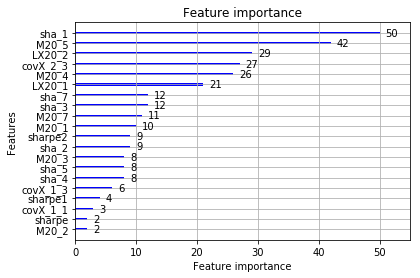

In [109]:
lgb.plot_importance(gbl, max_num_features=20, color='b')

# Résultat 0.5428

In [112]:
dt1b=dt1.drop(['fy','y'],axis=1)

In [114]:
k=2
rtr=RandomForestRegressor(max_depth=k, criterion="mae",random_state=rs)
rtr.fit(di1, do.custom)
y_r=rtr.predict(di1)
y_s=rtr.predict(dt1b)
print("training mae {:.3f}".format(mean_absolute_error(y_r,do.custom)))
dt1b['fy']=y_s
dt1b['y']=-np.sign(dt1b['fy'])/(np.log(abs(dt1b['fy'])))

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


training mae 0.509


In [117]:
dt1b.y.to_csv('Napo2_RF2a2.csv')

In [132]:
# adapted from Muller & Guido 
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

def plot_feature_importances(model, Frame):
    plt.clf()
    n_features=len(Frame.columns)
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Frame.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


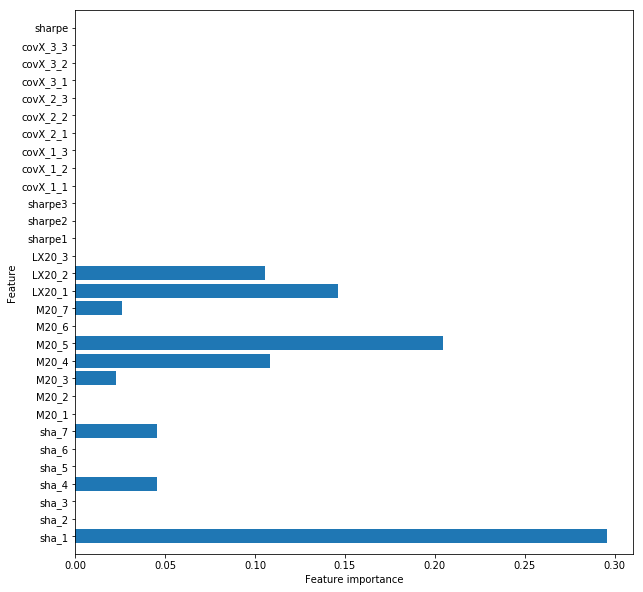

In [158]:
#dt2=dt1.drop(['fy','y'],axis=1)
dt2=dt1
plot_feature_importances(rtr, dt2)

# Résultat 0.5434

In [119]:
# en faisant la moyenne des deux prévisions :
dt1b['z']=(dt1b['y']+dt1['y'])/2
dt1b.z.to_csv('Napo2_moy.csv')

# Résultat 0.539

In [161]:
import shap
import warnings

In [168]:
features.head()

,sha_1,sha_2,sha_3,sha_4,sha_5,sha_6,sha_7,M20_1,M20_2,M20_3,...,covX_1_1,covX_1_2,covX_1_3,covX_2_1,covX_2_2,covX_2_3,covX_3_1,covX_3_2,covX_3_3,sharpe
ID,,,,,,,,,,,,,,,,,,,,,
10000,-0.234657,-0.228710,-0.240125,-0.152875,-0.223286,-0.214923,-0.228569,-0.038840,-0.087411,-0.077158,...,0.122510,-1.053892,0.012432,-1.053892,9.112126,-0.107647,0.012432,-0.107647,0.001411,-0.562767
10001,-0.026111,-0.003646,-0.070303,-0.020026,0.159788,0.000000,0.058248,-0.014772,0.014366,-0.010834,...,0.019116,-0.127689,0.004834,-0.127689,0.869033,-0.032042,0.004834,-0.032042,0.001446,-0.092131
10002,0.042812,0.102468,-0.223197,0.078655,0.223597,0.000000,-0.173176,0.023616,0.018991,-0.028024,...,0.005145,-0.068467,-0.000055,-0.068467,0.981935,0.000352,-0.000055,0.000352,0.000128,0.258671
10003,0.246071,0.079652,0.265105,0.441234,0.055426,0.256366,0.246952,0.015353,0.026599,0.012144,...,0.004534,-0.012336,0.005639,-0.012336,0.120279,-0.003064,0.005639,-0.003064,0.009398,0.237054
10004,0.015282,-0.016495,-0.017384,0.000000,-0.035117,0.000000,0.011686,-0.000796,0.006222,0.024194,...,0.001199,-0.008939,-0.001356,-0.008939,0.100009,0.001954,-0.001356,0.001954,0.005089,-0.102969


In [186]:
explainer = shap.TreeExplainer(rtr)
shap_values = explainer.shap_values(dt1)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


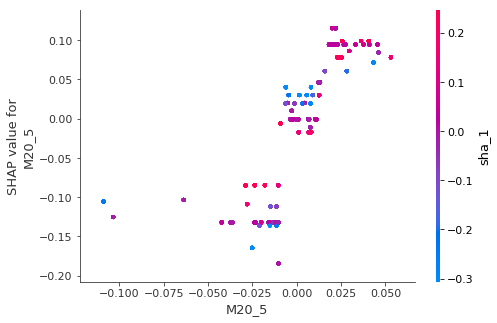

In [192]:
# We can pass a feature name instead of an index
shap.dependence_plot('M20_5', shap_values,dt1)